# **Inteligência Artificial**

<table>
    <tr> <td bgcolor="red"> Grupo </td> <td bgcolor="red"> RA </td>
    <tr> <td> Bruno Castro Tomaz </td> <td> 10389988 </td>
    <tr> <td> Tomás Fiorelli Barbosa </td> <td> 10395687 </td>
</table>

**Atividade**                                                                                 \
1º Bimestre (N1) - A Proposta, Dataset, Análise Exploratória/Preparação dos Dados e Relatório \
2º Bimestre (N2) - Desenvolvimento, Resultados e Relatório Completo

## Descrição e Proposta de Dataset

Este artigo descreve os resultados obtidos após a realização de análise preditiva, utilizando algoritmos de aprendizagem de máquina Supervisionados, em um conjunto de dados com informações a respeito de cogumelos – caule, cor da cabeça, guelras e entre outros. O objetivo da análise é prever quais cogumelos são comestíveis e quais são venenosos (classes preditas).

### *Importação de Bibliotecas*

In [1]:
import numpy as np
import pandas as pd
import sklearn as sl
import seaborn as sns
import statsmodels.formula.api as sm
from statsmodels import __version__ as sm_version
import matplotlib.pyplot as plt
from matplotlib import __version__ as plt_version

print(f'{np.__version__:<6}', '<numpy>')
print(f'{pd.__version__:<6}', '<pandas>')
print(f'{sl.__version__:<6}', '<scikit-learn>')
print(f'{sns.__version__:<6}', '<seaborn>')
print(f'{sm_version:<6}', '<statsmodels>')
print(f'{plt_version:<6}', '<matplotlib>')

2.1.1  <numpy>
2.2.2  <pandas>
1.5.2  <scikit-learn>
0.13.2 <seaborn>
0.14.3 <statsmodels>
3.9.2  <matplotlib>


### *Importação do Dataset*

1. cap-diameter (m): float number in cm
2. cap-shape (n): bell=b, conical=c, convex=x, flat=f, sunken=s, spherical=p, others=o
3. cap-surface (n): fibrous=i, grooves=g, scaly=y, smooth=s, dry=d, shiny=h, leathery=l, silky=k, sticky=t, wrinkled=w, fleshy=e
4. cap-color (n): brown=n, buff=b, gray=g, green=r, pink=p, purple=u, red=e, white=w, yellow=y, blue=l, orange=o, black=k
5. does-bruise-bleed (n): bruises-or-bleeding=t,no=f
6. gill-attachment (n): adnate=a, adnexed=x, decurrent=d, free=e, sinuate=s, pores=p, none=f, unknown=?
7. gill-spacing (n): close=c, distant=d, none=f
8. gill-color (n): see cap-color + none=f
9. stem-height (m): float number in cm
10. stem-width (m): float number in mm
11. stem-root (n): bulbous=b, swollen=s, club=c, cup=u, equal=e, rhizomorphs=z, rooted=r
12. stem-surface (n): see cap-surface + none=f
13. stem-color (n): see cap-color + none=f
14. veil-type (n): partial=p, universal=u
15. veil-color (n): see cap-color + none=f
16. has-ring (n): ring=t, none=f
17. ring-type (n): cobwebby=c, evanescent=e, flaring=r, grooved=g, large=l, pendant=p, sheathing=s, zone=z, scaly=y, movable=m, none=f, unknown=?
18. spore-print-color (n): see cap color
19. habitat (n): grasses=g, leaves=l, meadows=m, paths=p, heaths=h, urban=u, waste=w, woods=d
20. season (n): spring=s, summer=u, autumn=a, winter=w
21. class (n): e=edible, p=poisonous

In [2]:
mushroom_dataset = pd.read_csv('mushroom_overload.csv', sep=',', encoding='UTF-8')
mushroom_dataset.columns = [column.replace("class", "mushroom-class") for column in mushroom_dataset.columns]
mushroom_dataset.columns = [column.replace("-", "_") for column in mushroom_dataset.columns]

mushroom_dataset.shape

C:\Users\tomas\AppData\Local\Temp\ipykernel_10464\153146991.py:1: DtypeWarning: Columns (14,15) have mixed types. Specify dtype option on import or set low_memory=False.
  mushroom_dataset = pd.read_csv('mushroom_overload.csv', sep=',', encoding='UTF-8')


(6723116, 21)

In [3]:
mushroom_dataset.dtypes

mushroom_class           object
cap_diameter            float64
cap_shape                object
cap_surface              object
cap_color                object
does_bruise_or_bleed     object
gill_attachment          object
gill_spacing             object
gill_color               object
stem_height             float64
stem_width              float64
stem_root                object
stem_surface             object
stem_color               object
veil_type                object
veil_color               object
has_ring                 object
ring_type                object
spore_print_color        object
habitat                  object
season                   object
dtype: object

In [4]:
mushroom_dataset.head(10)

,mushroom_class,cap_diameter,cap_shape,cap_surface,cap_color,does_bruise_or_bleed,gill_attachment,gill_spacing,gill_color,stem_height,...,stem_root,stem_surface,stem_color,veil_type,veil_color,has_ring,ring_type,spore_print_color,habitat,season
0,p,17.18,f,g,e,f,e,NaN,w,18.58,...,s,y,w,u,w,t,g,NaN,d,a
1,p,15.30,x,h,e,f,e,NaN,w,16.95,...,s,y,w,u,w,t,g,NaN,d,u
2,p,14.94,f,h,o,f,e,NaN,w,16.84,...,s,y,w,u,w,t,p,NaN,d,a
3,p,13.37,f,g,e,f,e,NaN,w,18.10,...,s,y,w,u,w,t,g,NaN,d,u
4,p,17.23,x,h,e,f,e,NaN,w,17.42,...,s,y,w,u,w,t,p,NaN,d,w
5,p,13.90,x,h,e,f,e,NaN,w,17.83,...,s,y,w,u,w,t,g,NaN,d,a
6,p,16.18,f,h,o,f,e,NaN,w,18.63,...,s,y,w,u,w,t,g,NaN,d,u
7,p,19.17,x,h,e,f,e,NaN,w,19.71,...,s,y,w,u,w,t,g,NaN,d,a
8,p,14.95,x,g,e,f,e,NaN,w,18.38,...,s,y,w,u,w,t,g,NaN,d,w
9,p,13.39,f,h,e,f,e,NaN,w,18.34,...,s,y,w,u,w,t,p,NaN,d,u


### *Análise Exploratória / Preparação dos Dados*

In [5]:
mushroom_dataset.duplicated().sum()

np.int64(0)

In [6]:
mushroom_dataset.isnull().sum()

mushroom_class                0
cap_diameter                  0
cap_shape                     0
cap_surface             1579337
cap_color                     0
does_bruise_or_bleed          0
gill_attachment         1066721
gill_spacing            2800709
gill_color                    0
stem_height                   0
stem_width                    0
stem_root               5763499
stem_surface            4263506
stem_color                    0
veil_type               6367343
veil_color              5893024
has_ring                      0
ring_type                276729
spore_print_color       6049365
habitat                       0
season                        0
dtype: int64

In [7]:
mushroom_dataset.drop(['cap_surface',
                       'gill_attachment',
                       'gill_spacing',
                       'gill_color',            # repetição de cap_color
                       'stem_root',
                       'stem_surface',          # repetição de cap_surface
                       'stem_color',            # repetição de cap_color
                       'veil_type',
                       'veil_color',            # repetição de cap_color
                       'ring_type',
                       'spore_print_color'],    # repetição de cap_color
                       axis='columns', inplace=True)

mushroom_dataset.isnull().sum()

mushroom_class          0
cap_diameter            0
cap_shape               0
cap_color               0
does_bruise_or_bleed    0
stem_height             0
stem_width              0
has_ring                0
habitat                 0
season                  0
dtype: int64

In [8]:
# Identificado valor negativo no mínimo de 'stem-width'
mushroom_dataset.describe()

,cap_diameter,stem_height,stem_width
count,6.723116e+06,6.723116e+06,6.723116e+06
mean,6.792650e+00,6.697878e+00,1.236342e+01
std,5.279232e+00,3.300607e+00,9.967683e+00
min,2.200000e-01,0.000000e+00,-6.400000e-01
25%,3.520000e+00,4.710000e+00,5.470000e+00
50%,5.960000e+00,6.010000e+00,1.039000e+01
75%,8.600000e+00,7.790000e+00,1.672000e+01
max,6.689000e+01,3.770000e+01,1.186800e+02


In [9]:
stem_width_under_zero = mushroom_dataset[mushroom_dataset['stem_width'] < 0].index
stem_width_under_zero

Index([4144677], dtype='int64')

In [10]:
mushroom_dataset.drop(stem_width_under_zero, inplace=True)

### One-Hot Encoding

In [11]:
mushroom_onehotenconding = pd.get_dummies(mushroom_dataset, drop_first=True)
mushroom_onehotenconding.to_csv('mushroom_onehotenconding.csv')
mushroom_onehotenconding.corr(method='pearson')

,cap_diameter,stem_height,stem_width,mushroom_class_p,cap_shape_c,cap_shape_f,cap_shape_o,cap_shape_p,cap_shape_s,cap_shape_x,...,habitat_g,habitat_h,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w,season_s,season_u,season_w
cap_diameter,1.000000,0.420234,0.696700,-0.174757,-0.101372,0.019666,0.204290,0.091120,0.044315,-0.015968,...,-0.180930,-0.065971,-0.043991,-0.043315,-0.051698,0.026987,-0.004377,0.045982,-0.004962,0.050047
stem_height,0.420234,1.000000,0.414393,-0.097758,-0.012246,-0.015151,-0.156013,0.287365,-0.129624,0.042983,...,-0.072625,-0.050698,-0.032961,0.026711,-0.051410,0.166117,-0.051333,-0.022522,0.007498,-0.014762
stem_width,0.696700,0.414393,1.000000,-0.182692,-0.088438,-0.034736,0.223589,0.141279,0.058702,0.008708,...,-0.219806,-0.100568,0.000710,-0.063300,0.033902,0.000556,0.001000,0.003902,-0.021398,0.049084
mushroom_class_p,-0.174757,-0.097758,-0.182692,1.000000,0.012169,-0.032257,0.052050,-0.063665,-0.007713,-0.057277,...,0.106421,0.037043,-0.081806,-0.014919,0.070119,-0.049065,-0.084579,-0.064787,0.035634,-0.110620
cap_shape_c,-0.101372,-0.012246,-0.088438,0.012169,1.000000,-0.094829,-0.036919,-0.037935,-0.064892,-0.158936,...,0.032298,-0.001038,0.060236,-0.040344,0.099400,-0.007888,-0.013597,0.076182,0.022760,-0.054203
cap_shape_f,0.019666,-0.015151,-0.034736,-0.032257,-0.094829,1.000000,-0.112004,-0.115085,-0.196868,-0.482173,...,-0.035935,-0.014140,0.076226,0.036864,0.004706,0.030508,0.050781,-0.058706,-0.031883,0.052616
cap_shape_o,0.204290,-0.156013,0.223589,0.052050,-0.036919,-0.112004,1.000000,-0.044805,-0.076645,-0.187722,...,-0.081211,-0.038753,0.006484,-0.047651,0.176532,-0.009317,-0.016060,0.173514,-0.001380,0.024141
cap_shape_p,0.091120,0.287365,0.141279,-0.063665,-0.037935,-0.115085,-0.044805,1.000000,-0.078754,-0.192885,...,-0.013010,-0.039819,0.003183,0.182050,-0.016545,0.097390,-0.016502,0.100826,-0.014815,-0.027288
cap_shape_s,0.044315,-0.129624,0.058702,-0.007713,-0.064892,-0.196868,-0.076645,-0.078754,1.000000,-0.329955,...,-0.063616,0.058570,0.038338,-0.074055,-0.028303,-0.016376,-0.028229,-0.077668,0.031935,-0.024034
cap_shape_x,-0.015968,0.042983,0.008708,-0.057277,-0.158936,-0.482173,-0.187722,-0.192885,-0.329955,1.000000,...,-0.008127,0.019604,-0.077386,-0.081115,-0.069321,-0.040108,0.008448,-0.080551,-0.008419,0.004797


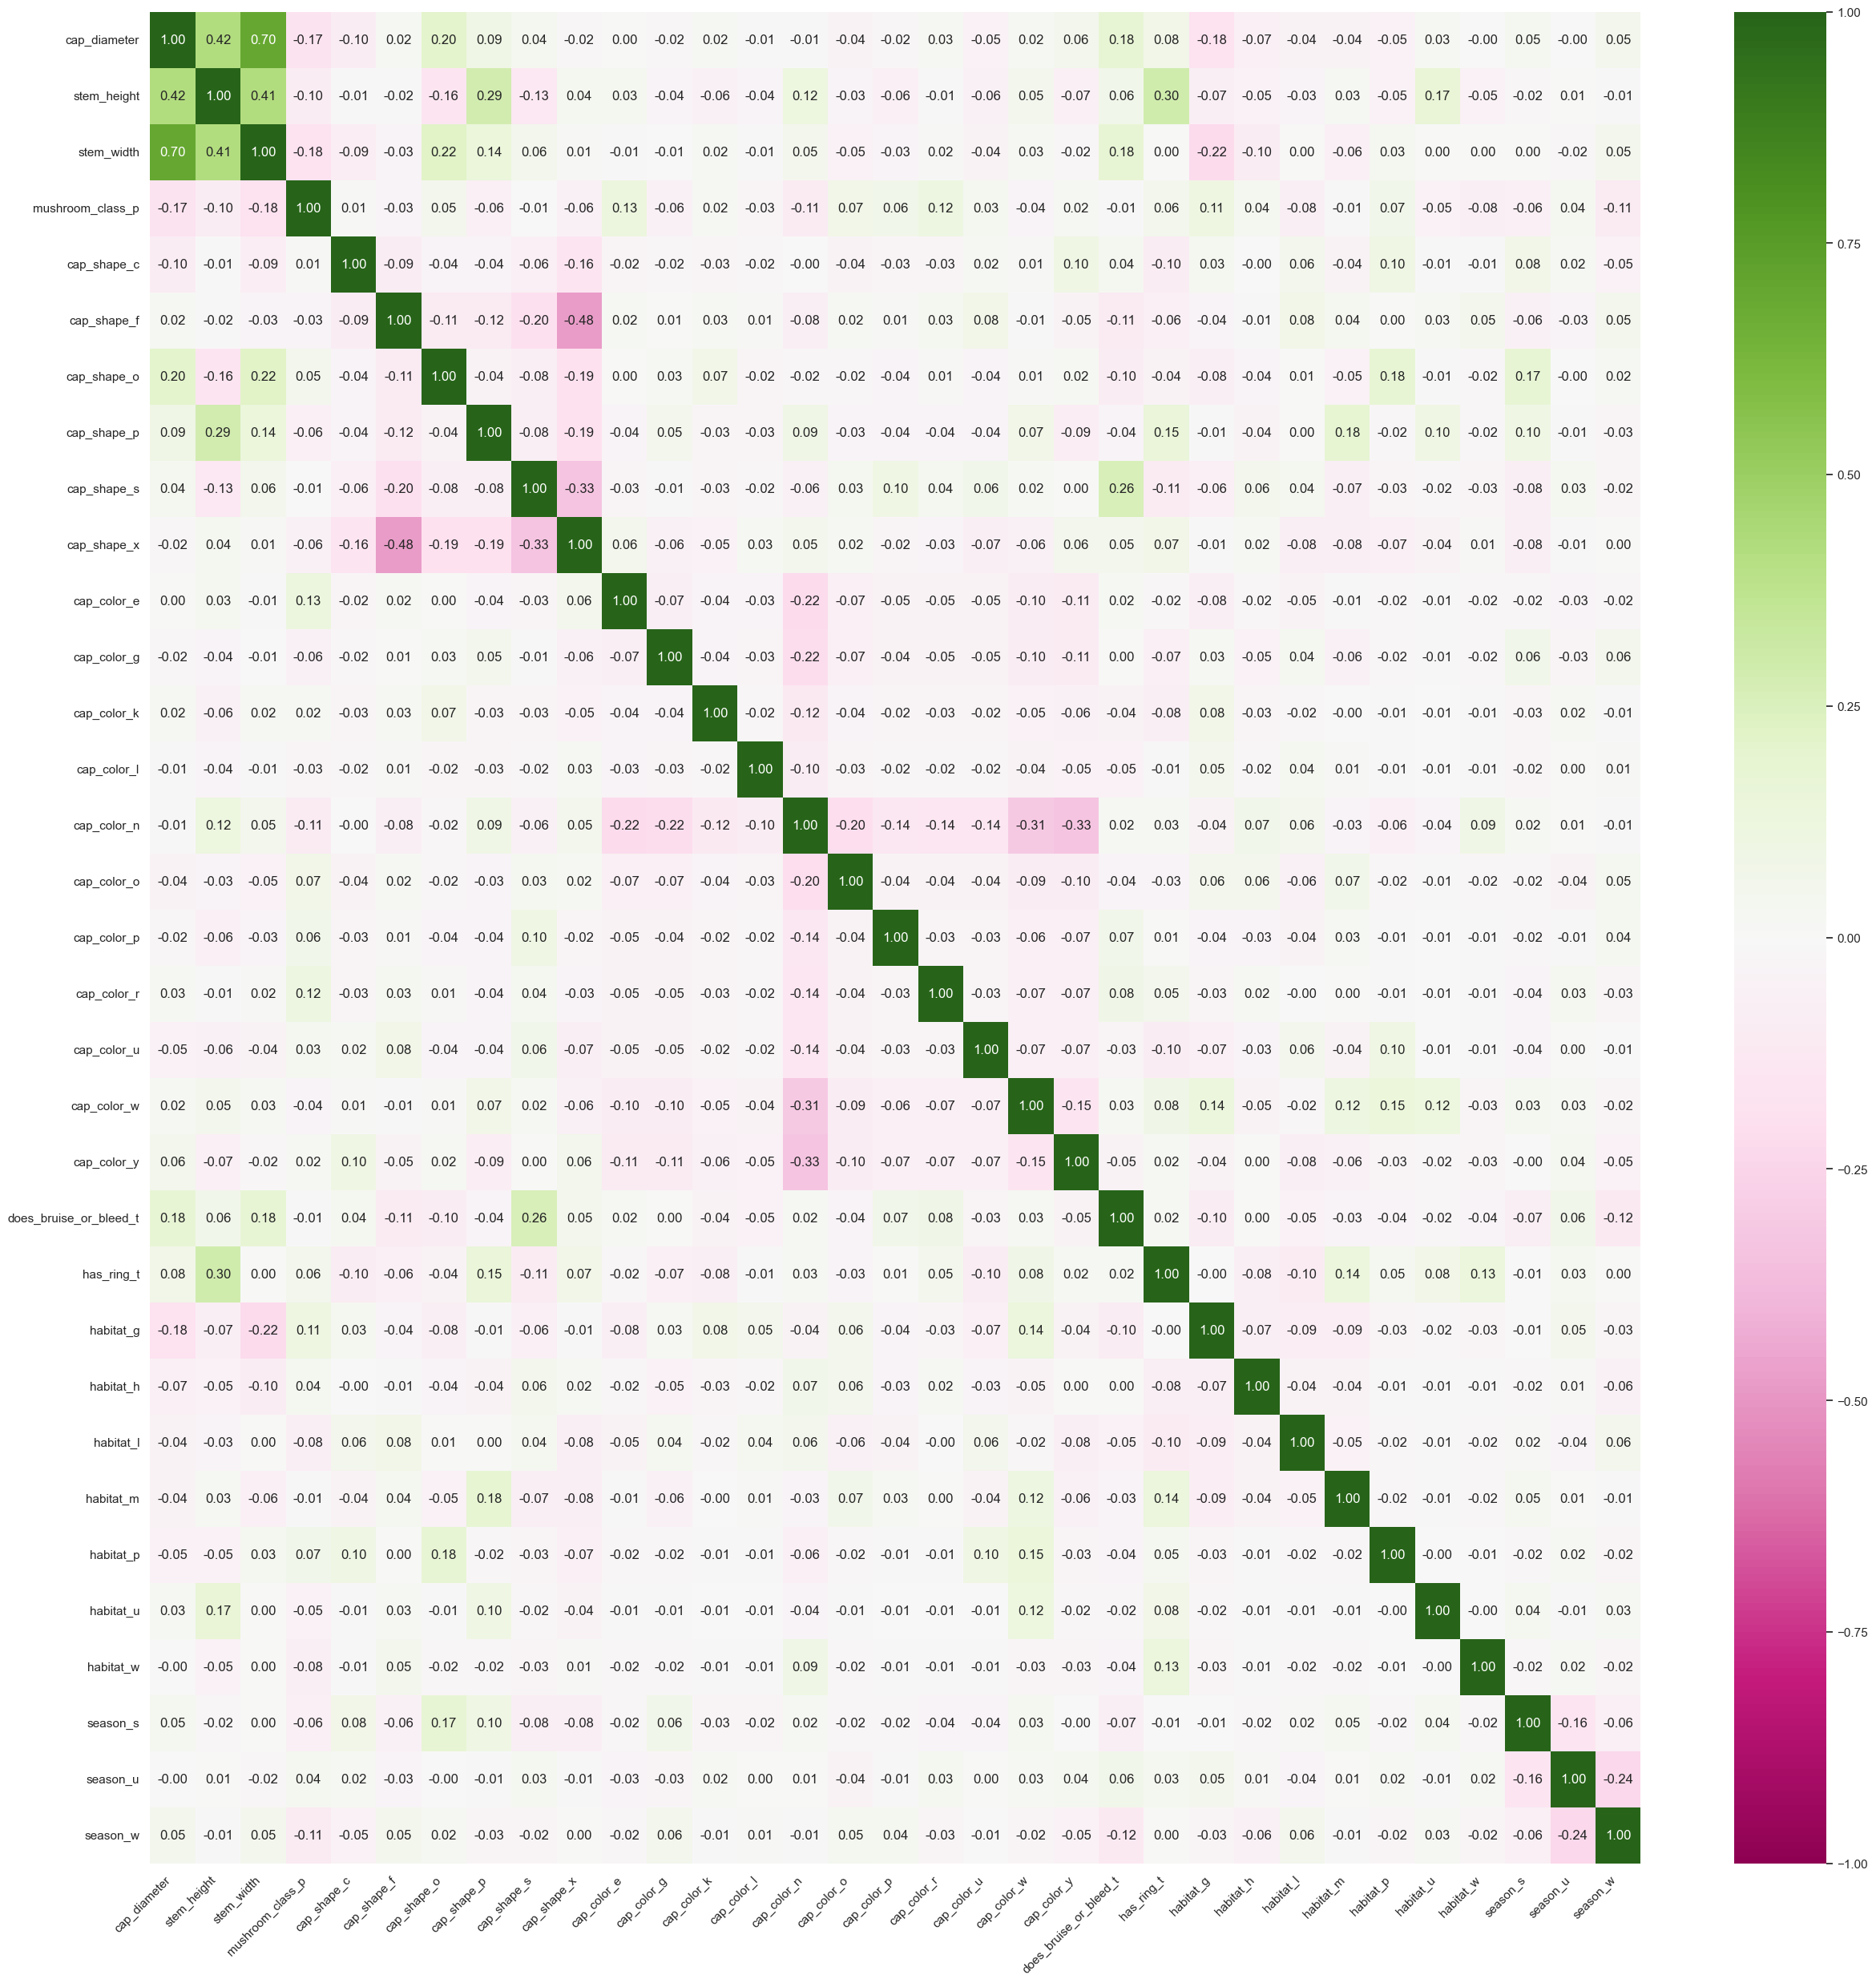

In [26]:
ax = sns.heatmap(mushroom_onehotenconding.corr(), vmin=-1, vmax=1, center=0, annot=True, cmap='PiYG', fmt='.2f')
sns.set(rc={'figure.figsize':(30, 30)})
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')

plt.savefig("imagens/heatmap_onehotenconding.png")

In [13]:
print(mushroom_onehotenconding['mushroom_class_p'].dtype)
print(mushroom_onehotenconding['mushroom_class_p'].unique())

mushroom_onehotenconding['mushroom_class_p'] = mushroom_onehotenconding['mushroom_class_p'].astype(int)

print(mushroom_onehotenconding['mushroom_class_p'].dtype)
print(mushroom_onehotenconding['mushroom_class_p'].unique())

bool
[ True False]
int64
[1 0]


In [24]:
columns = ['cap_diameter', 'stem_height', 'stem_width',
           'cap_shape_c', 'cap_shape_f', 'cap_shape_o', 'cap_shape_p', 'cap_shape_s', 'cap_shape_x',
           'cap_color_e', 'cap_color_g', 'cap_color_k', 'cap_color_l', 'cap_color_n', 'cap_color_o', 'cap_color_p', 'cap_color_r', 'cap_color_u', 'cap_color_w', 'cap_color_y',
           'does_bruise_or_bleed_t', 'has_ring_t',
           'habitat_g', 'habitat_h', 'habitat_l', 'habitat_m', 'habitat_p', 'habitat_u', 'habitat_w',
           'season_s', 'season_u', 'season_w']
all_attributes = 'mushroom_class_p ~ ' + ' + '.join(columns[1:])

In [15]:
columns = ['cap_diameter', 'stem_height', 'stem_width']
float_attributes = 'mushroom_class_p ~ ' + ' + '.join(columns[1:])

In [16]:
model = sm.ols(formula=float_attributes, data=mushroom_onehotenconding)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:       mushroom_class_p   R-squared:                       0.034
Model:                            OLS   Adj. R-squared:                  0.034
Method:                 Least Squares   F-statistic:                 1.182e+05
Date:                Sun, 29 Sep 2024   Prob (F-statistic):               0.00
Time:                        20:33:38   Log-Likelihood:            -4.7331e+06
No. Observations:             6723115   AIC:                         9.466e+06
Df Residuals:                 6723112   BIC:                         9.466e+06
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.6803      0.000   1564.526      

In [27]:
model = sm.ols(formula=all_attributes, data=mushroom_onehotenconding)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:       mushroom_class_p   R-squared:                       0.158
Model:                            OLS   Adj. R-squared:                  0.158
Method:                 Least Squares   F-statistic:                 4.071e+04
Date:                Sun, 29 Sep 2024   Prob (F-statistic):               0.00
Time:                        21:14:40   Log-Likelihood:            -4.2710e+06
No. Observations:             6723115   AIC:                         8.542e+06
Df Residuals:                 6723083   BIC:                         8.543e+06
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept   

In [22]:
model = sm.logit(formula=float_attributes, data=mushroom_onehotenconding)
result = model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.671041
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:       mushroom_class_p   No. Observations:              6723115
Model:                          Logit   Df Residuals:                  6723112
Method:                           MLE   Df Model:                            2
Date:                Sun, 29 Sep 2024   Pseudo R-squ.:                 0.02557
Time:                        20:37:10   Log-Likelihood:            -4.5115e+06
converged:                       True   LL-Null:                   -4.6299e+06
Covariance Type:            nonrobust   LLR p-value:                     0.000
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.7656      0.002    409.170      0.000       0.762       0.769
stem_height    -0.0167    

In [25]:
model = sm.logit(formula=all_attributes, data=mushroom_onehotenconding)
result = model.fit()
print(result.summary())

         Current function value: 0.600178
         Iterations: 35


c:\Users\tomas\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                           Logit Regression Results                           
Dep. Variable:       mushroom_class_p   No. Observations:              6723115
Model:                          Logit   Df Residuals:                  6723083
Method:                           MLE   Df Model:                           31
Date:                Sun, 29 Sep 2024   Pseudo R-squ.:                  0.1285
Time:                        20:41:46   Log-Likelihood:            -4.0351e+06
converged:                      False   LL-Null:                   -4.6299e+06
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept                          0.4383      0.008     56.381      0.000       0.423       0.454
cap_shape_c[T.True]               -0.9334      0.006   -157.998      0.